In [1]:
import numpy as np
import pandas as pd
import sklearn
import scipy
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report,accuracy_score
from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import classification_report
from sklearn.ensemble import VotingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
import math
from pylab import rcParams
rcParams['figure.figsize']=14,8
RANDOM_SEED=42
LABELS=["Normal", "Fraud",]
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import accuracy_score

In [2]:
dataset=pd.read_csv('cust_transaction_details.csv')

In [3]:
dataset.head()

,Unnamed: 0,customerEmail,transactionId,orderId,paymentMethodId,paymentMethodRegistrationFailure,paymentMethodType,paymentMethodProvider,transactionAmount,transactionFailed,orderState
0,0,josephhoward@yahoo.com,a9lcj51r,vjbdvd,wt07xm68b,1,card,JCB 16 digit,18,0,pending
1,1,josephhoward@yahoo.com,y4wcv03i,yp6x27,wt07xm68b,1,card,JCB 16 digit,26,0,fulfilled
2,2,evansjeffery@yahoo.com,5mi94sfw,nlghpa,41ug157xz,0,bitcoin,American Express,45,0,fulfilled
3,3,evansjeffery@yahoo.com,br8ba1nu,uw0eeb,41ug157xz,0,bitcoin,American Express,23,0,fulfilled
4,4,evansjeffery@yahoo.com,a33145ss,bn44oh,y3xp697jx,1,bitcoin,VISA 16 digit,43,1,fulfilled


In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 623 entries, 0 to 622
Data columns (total 11 columns):
 #   Column                            Non-Null Count  Dtype 
---  ------                            --------------  ----- 
 0   Unnamed: 0                        623 non-null    int64 
 1   customerEmail                     623 non-null    object
 2   transactionId                     623 non-null    object
 3   orderId                           623 non-null    object
 4   paymentMethodId                   623 non-null    object
 5   paymentMethodRegistrationFailure  623 non-null    int64 
 6   paymentMethodType                 623 non-null    object
 7   paymentMethodProvider             623 non-null    object
 8   transactionAmount                 623 non-null    int64 
 9   transactionFailed                 623 non-null    int64 
 10  orderState                        623 non-null    object
dtypes: int64(4), object(7)
memory usage: 53.7+ KB


In [5]:
X=dataset
y=dataset["orderState"]

In [6]:
X= X.drop(["Unnamed: 0", "customerEmail","transactionId","orderId", "paymentMethodId", "orderState" ], axis=1)
X

,paymentMethodRegistrationFailure,paymentMethodType,paymentMethodProvider,transactionAmount,transactionFailed
0,1,card,JCB 16 digit,18,0
1,1,card,JCB 16 digit,26,0
2,0,bitcoin,American Express,45,0
3,0,bitcoin,American Express,23,0
4,1,bitcoin,VISA 16 digit,43,1
...,...,...,...,...,...
618,0,card,VISA 13 digit,25,1
619,0,card,VISA 13 digit,25,0
620,0,paypal,JCB 15 digit,25,1
621,0,paypal,JCB 15 digit,19,0


In [7]:
from sklearn import preprocessing

In [8]:
label_encoder = preprocessing.LabelEncoder()
X['paymentMethodType']= label_encoder.fit_transform(X['paymentMethodType'])
X['paymentMethodProvider']= label_encoder.fit_transform(X['paymentMethodProvider'])

In [9]:
X

,paymentMethodRegistrationFailure,paymentMethodType,paymentMethodProvider,transactionAmount,transactionFailed
0,1,2,4,18,0
1,1,2,4,26,0
2,0,1,0,45,0
3,0,1,0,23,0
4,1,1,8,43,1
...,...,...,...,...,...
618,0,2,7,25,1
619,0,2,7,25,0
620,0,3,3,25,1
621,0,3,3,19,0


In [10]:
y.unique()

array(['pending', 'fulfilled', 'failed'], dtype=object)

In [11]:
y= y.map({'pending':0, 'fulfilled':1, 'failed':2})

In [12]:
y

0      0
1      1
2      1
3      1
4      1
      ..
618    1
619    1
620    1
621    1
622    1
Name: orderState, Length: 623, dtype: int64

In [13]:
print("Input Range : ", X.shape)
print("Output Range : ", y.shape)

Input Range :  (623, 5)
Output Range :  (623,)


In [14]:
print ("Class Labels : \n",y)

Class Labels : 
 0      0
1      1
2      1
3      1
4      1
      ..
618    1
619    1
620    1
621    1
622    1
Name: orderState, Length: 623, dtype: int64


In [15]:
print ("Class Labels : \n",X)

Class Labels : 
      paymentMethodRegistrationFailure  paymentMethodType  \
0                                   1                  2   
1                                   1                  2   
2                                   0                  1   
3                                   0                  1   
4                                   1                  1   
..                                ...                ...   
618                                 0                  2   
619                                 0                  2   
620                                 0                  3   
621                                 0                  3   
622                                 0                  2   

     paymentMethodProvider  transactionAmount  transactionFailed  
0                        4                 18                  0  
1                        4                 26                  0  
2                        0                 45                

In [16]:
dataset.isnull().values.any()

False

Text(0, 0.5, 'No of occurences')

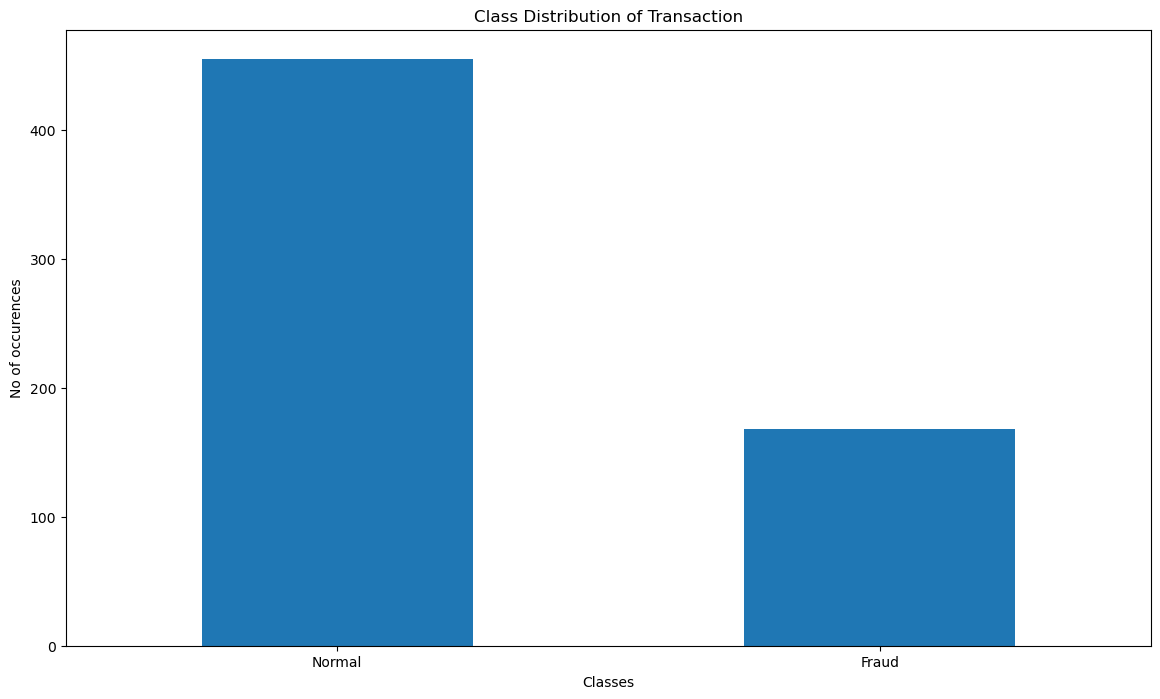

In [17]:
set_class=pd.value_counts(dataset['transactionFailed'], sort=True)
set_class.plot(kind='bar', rot=0)
plt.title("Class Distribution of Transaction")
plt.xticks(range(2), LABELS)
plt.xlabel("Classes")
plt.ylabel("No of occurences")

In [18]:
fraud_data=dataset[dataset['transactionFailed']==1]
normal_data=dataset[dataset['transactionFailed']==0]

In [19]:
print(fraud_data.shape,normal_data.shape)

(168, 11) (455, 11)


In [20]:
fraud_data.transactionAmount.describe()

count    168.000000
mean      34.678571
std       29.465970
min       10.000000
25%       19.750000
50%       33.000000
75%       43.000000
max      353.000000
Name: transactionAmount, dtype: float64

In [21]:
normal_data.transactionAmount.describe()

count    455.000000
mean      34.569231
std       15.765739
min       10.000000
25%       22.000000
50%       34.000000
75%       46.000000
max       75.000000
Name: transactionAmount, dtype: float64

<AxesSubplot:title={'center':'Pearson Correlation of attributes'}>

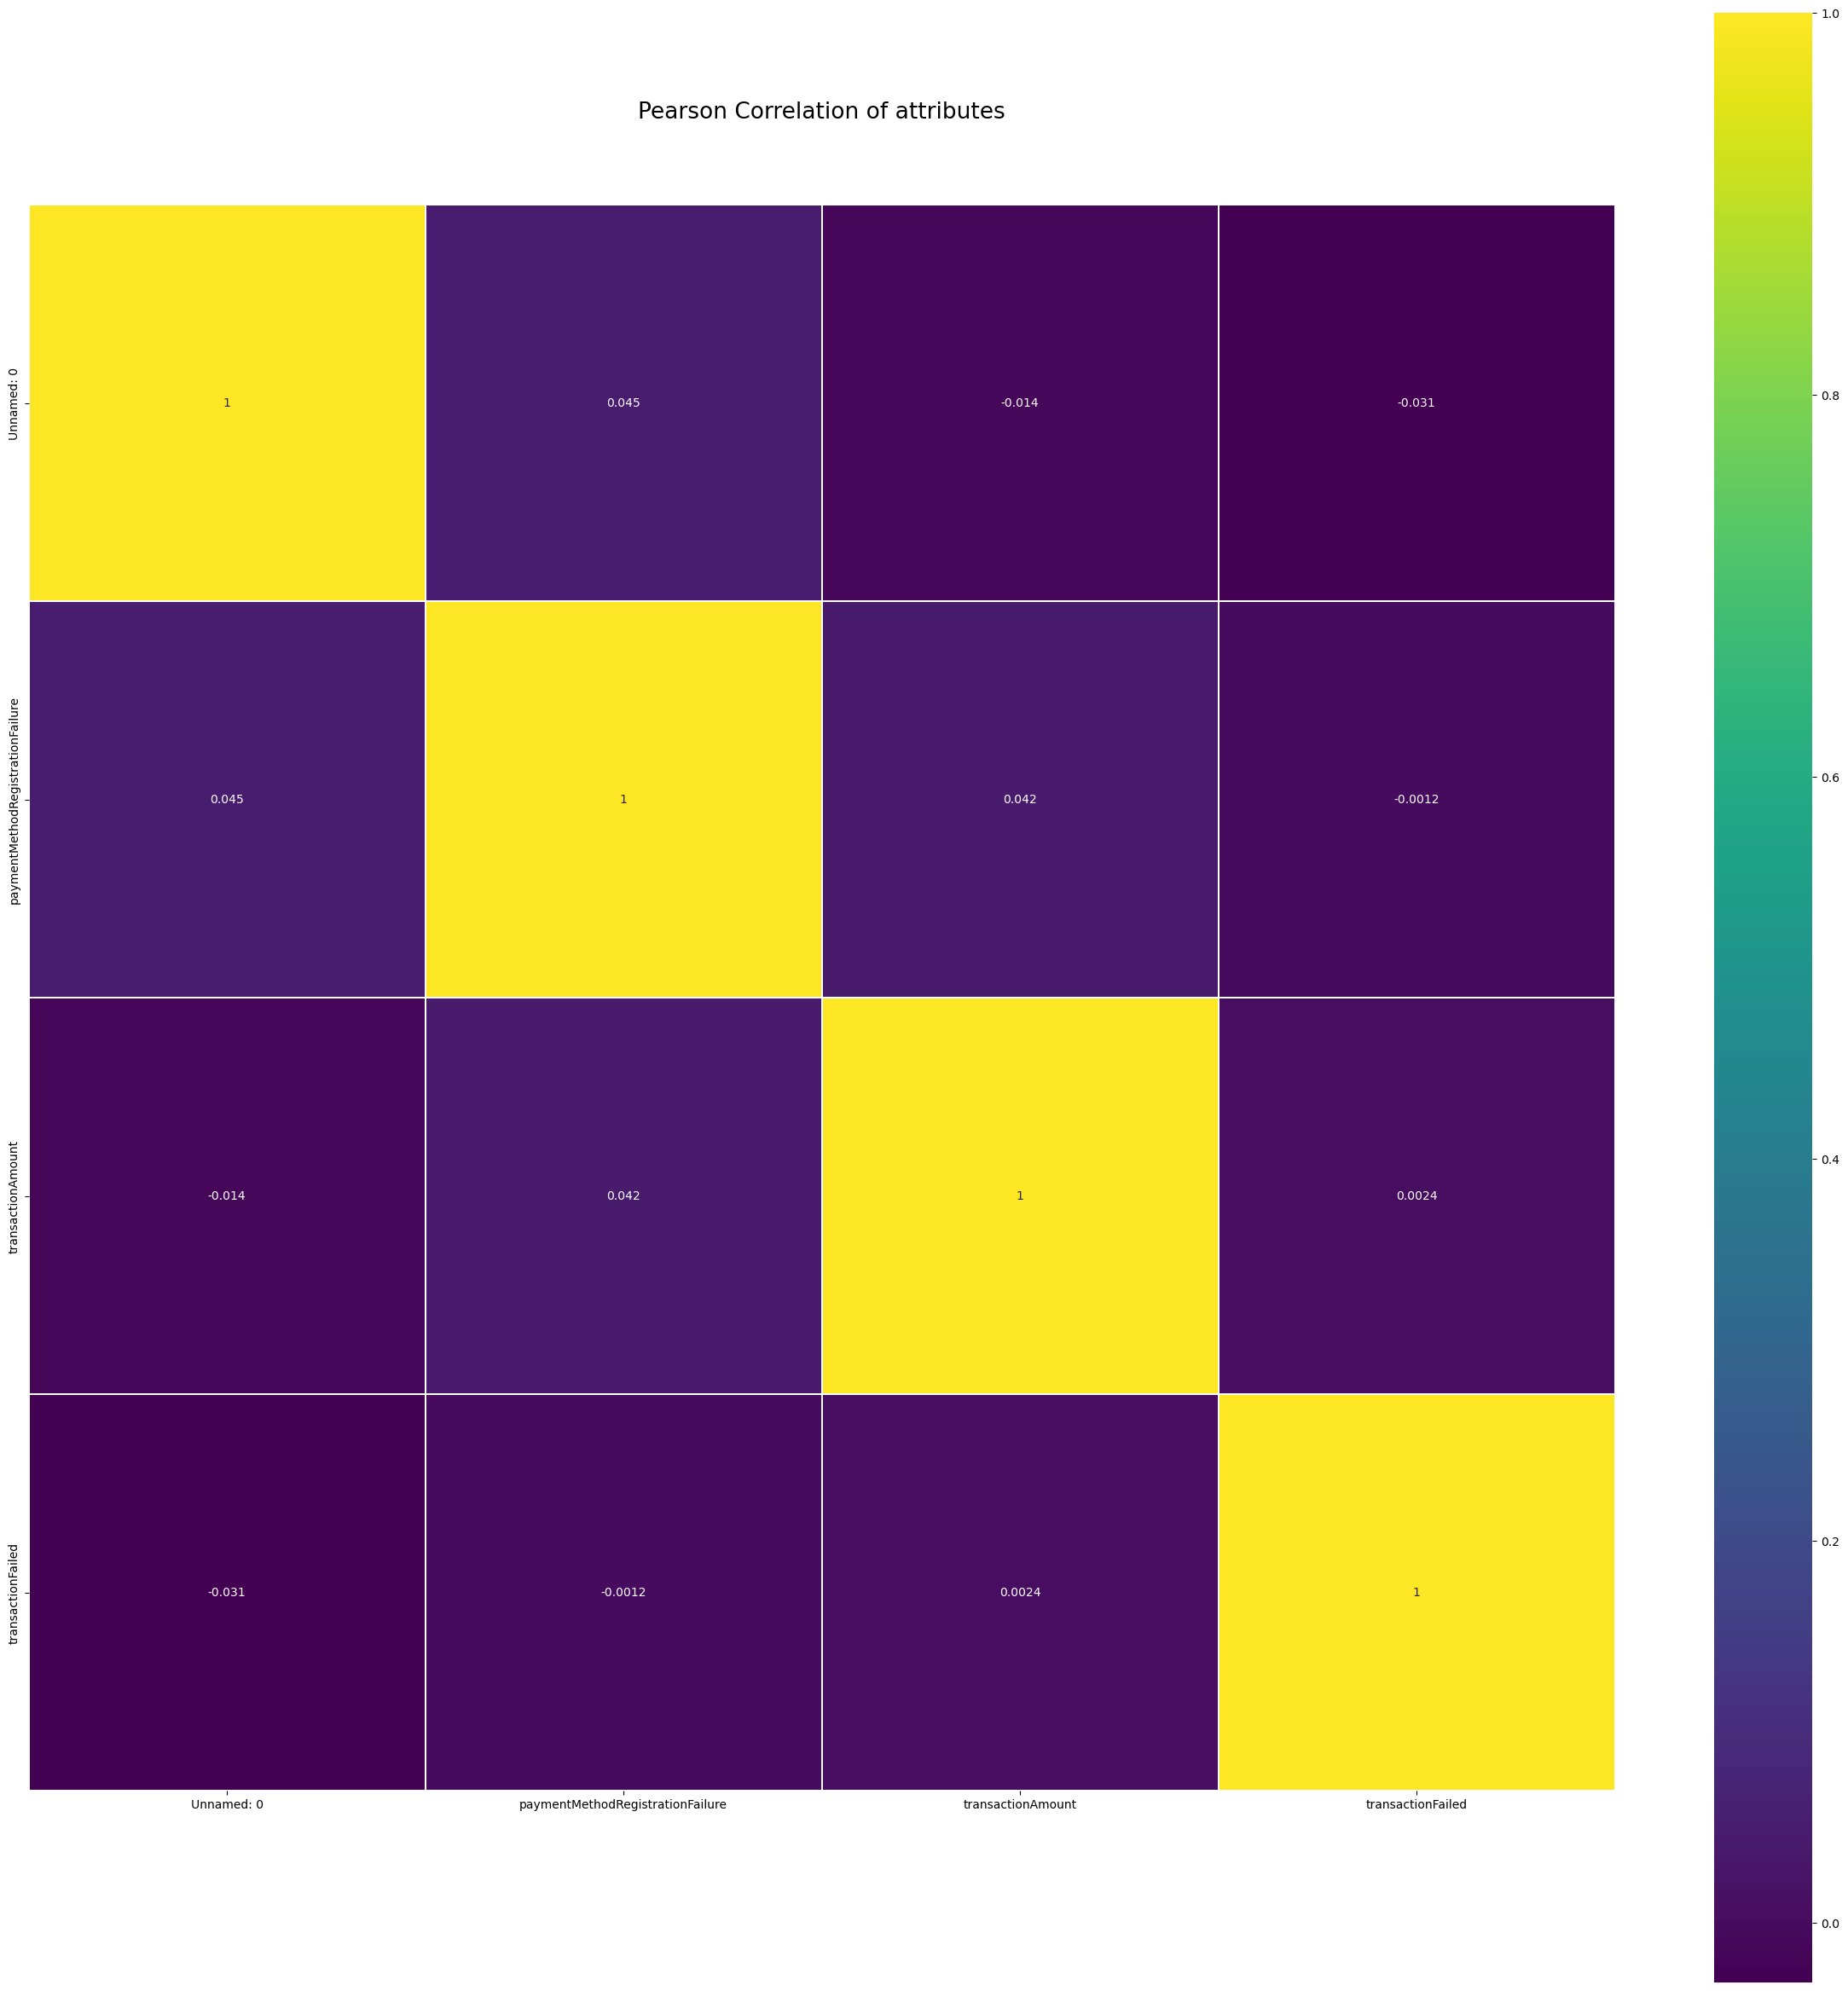

In [22]:
colormap=plt.cm.viridis
plt.figure(figsize=(30,30))
plt.title('Pearson Correlation of attributes',y=1.05,size=19)
sns.heatmap(dataset.corr(),linewidths=0.1,vmax=1.0,
           square=True,cmap=colormap, linecolor='white', annot=True)

In [23]:
X, y = make_classification(n_samples=1000, n_features=10, n_informative=5, n_classes=2, random_state=42)

In [24]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [25]:
svm_model = SVC(kernel='linear', probability=True)

In [26]:
svm_model.fit(X_train, y_train)

SVC(kernel='linear', probability=True)

In [27]:
svm_pred = svm_model.predict(X_test)
cm = confusion_matrix(y_test, svm_pred)
print("confusion Matrix : \n", cm)
accuracy_score(y_test,svm_pred)

confusion Matrix : 
 [[92 20]
 [11 77]]


0.845

In [28]:
report = classification_report(y_test,svm_pred)
print('classification report:', report)

classification report:               precision    recall  f1-score   support

           0       0.89      0.82      0.86       112
           1       0.79      0.88      0.83        88

    accuracy                           0.84       200
   macro avg       0.84      0.85      0.84       200
weighted avg       0.85      0.84      0.85       200



In [29]:
ann_model = MLPClassifier(hidden_layer_sizes=(16, 8), activation='relu', solver='adam', max_iter=500)

In [30]:
ann_model.fit(X_train, y_train)

C:\Users\Ankiee TheHancy\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(hidden_layer_sizes=(16, 8), max_iter=500)

In [31]:
ann_pred = ann_model.predict(X_test)
cm = confusion_matrix(y_test, ann_pred)
print("confusion Matrix : \n", cm)
accuracy_score(y_test,ann_pred)

confusion Matrix : 
 [[104   8]
 [  2  86]]


0.95

In [32]:
report = classification_report(y_test,ann_pred)
print('classification report:', report)

classification report:               precision    recall  f1-score   support

           0       0.98      0.93      0.95       112
           1       0.91      0.98      0.95        88

    accuracy                           0.95       200
   macro avg       0.95      0.95      0.95       200
weighted avg       0.95      0.95      0.95       200



In [33]:
ensemble_model = VotingClassifier(estimators=[('svm', svm_model), ('ann', ann_model)], voting='soft')

In [34]:
ensemble_model.fit(X_train, y_train)

C:\Users\Ankiee TheHancy\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


VotingClassifier(estimators=[('svm', SVC(kernel='linear', probability=True)),
                             ('ann',
                              MLPClassifier(hidden_layer_sizes=(16, 8),
                                            max_iter=500))],
                 voting='soft')

In [35]:
ensemble_pred = ensemble_model.predict(X_test)
ensemble_acc = accuracy_score(y_test, ensemble_pred)
print("Ensemble Accuracy:", ensemble_acc)

Ensemble Accuracy: 0.955


In [36]:
cm = confusion_matrix(y_test, ensemble_pred)
print("confusion Matrix : \n", cm)
accuracy_score(y_test,ensemble_pred)

confusion Matrix : 
 [[105   7]
 [  2  86]]


0.955

In [37]:
report = classification_report(y_test,ensemble_pred)
print('classification report:', report)

classification report:               precision    recall  f1-score   support

           0       0.98      0.94      0.96       112
           1       0.92      0.98      0.95        88

    accuracy                           0.95       200
   macro avg       0.95      0.96      0.95       200
weighted avg       0.96      0.95      0.96       200

